In [1]:
pip install dlib

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'c:\Users\ramya\anaconda3\envs\MyPythonData\python.exe' 'c:\Users\ramya\anaconda3\envs\MyPythonData\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\ramya\AppData\Local\Temp\tmp7iyedpw4'
       cwd: C:\Users\ramya\AppData\Local\Temp\pip-install-krwxwjpp\dlib
  Complete output (74 lines):
  running bdist_wheel
  running build
  running build_ext
  C:\Users\ramya\AppData\Local\Temp\pip-install-krwxwjpp\dlib\setup.py:125: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cmake_version) < '3.1.0':
  Building extension for Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\ramya\AppData\Local\Temp\pip-install-krwxwjpp\dlib\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\ramya\AppData\Local\Temp\pip-install-krwxwjpp\dlib\build\lib.win-amd64-cpython-37 -DPYTHON_EXECUTABLE=c:\U

Importing Libraries

Make sure you "pip install" the following libraries
* Pillow
* opencv-python
* scikit-learn
* seaborn
* Any other ones you are getting errors from after running the import cell


In [1]:
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import GlobalAveragePooling2D


plt.style.use('ggplot')

%matplotlib inline


In [3]:
# Set variables
main_folder = 'UnZipped/'
images_folder = main_folder + 'img_align_celeba/img_align_celeba/'

EXAMPLE_PIC = images_folder + '000506.jpg'

TRAINING_SAMPLES = 10000
VALIDATION_SAMPLES = 2000
TEST_SAMPLES = 2000
IMG_WIDTH = 178
IMG_HEIGHT = 218
BATCH_SIZE = 16
NUM_EPOCHS = 20


In [4]:
# import the data set that include the attribute for each picture
df_attr = pd.read_csv(main_folder + '/list_attr_celeba/list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True) #replace -1 by 0
df_attr.shape


(202599, 40)

In [5]:
# List of available attributes
for i, j in enumerate(df_attr.columns):
    print(i, j)

0 5_o_Clock_Shadow
1 Arched_Eyebrows
2 Attractive
3 Bags_Under_Eyes
4 Bald
5 Bangs
6 Big_Lips
7 Big_Nose
8 Black_Hair
9 Blond_Hair
10 Blurry
11 Brown_Hair
12 Bushy_Eyebrows
13 Chubby
14 Double_Chin
15 Eyeglasses
16 Goatee
17 Gray_Hair
18 Heavy_Makeup
19 High_Cheekbones
20 Male
21 Mouth_Slightly_Open
22 Mustache
23 Narrow_Eyes
24 No_Beard
25 Oval_Face
26 Pale_Skin
27 Pointy_Nose
28 Receding_Hairline
29 Rosy_Cheeks
30 Sideburns
31 Smiling
32 Straight_Hair
33 Wavy_Hair
34 Wearing_Earrings
35 Wearing_Hat
36 Wearing_Lipstick
37 Wearing_Necklace
38 Wearing_Necktie
39 Young


In [6]:
# List of available attributes
with open('attributes_list.txt', 'w') as file:
    for attribute in df_attr.columns:
        file.write(attribute + '\n')

Smiling    1
Male       0
Young      1
Name: 000506.jpg, dtype: int64

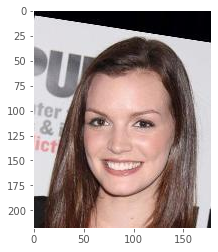

In [7]:
# plot picture and attributes
img = load_img(EXAMPLE_PIC)
plt.grid(False)
plt.imshow(img)
df_attr.loc[EXAMPLE_PIC.split('/')[-1]][['Smiling','Male','Young']] #some attributes


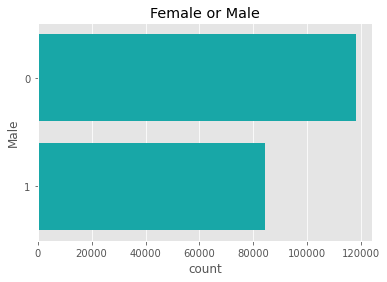

In [8]:
# Female or Male?
plt.title('Female or Male')
sns.countplot(y='Male', data=df_attr, color="c")
plt.show()

The recommended partitioning of images into training, validation, testing of the data set is:

* 1-162770 are training
* 162771-182637 are validation
* 182638-202599 are testing

The partition is in file list_eval_partition.csv

Due time execution, by now we will be using a reduced number of images:

* Training 20000 images
* Validation 5000 images
* Test 5000 Images


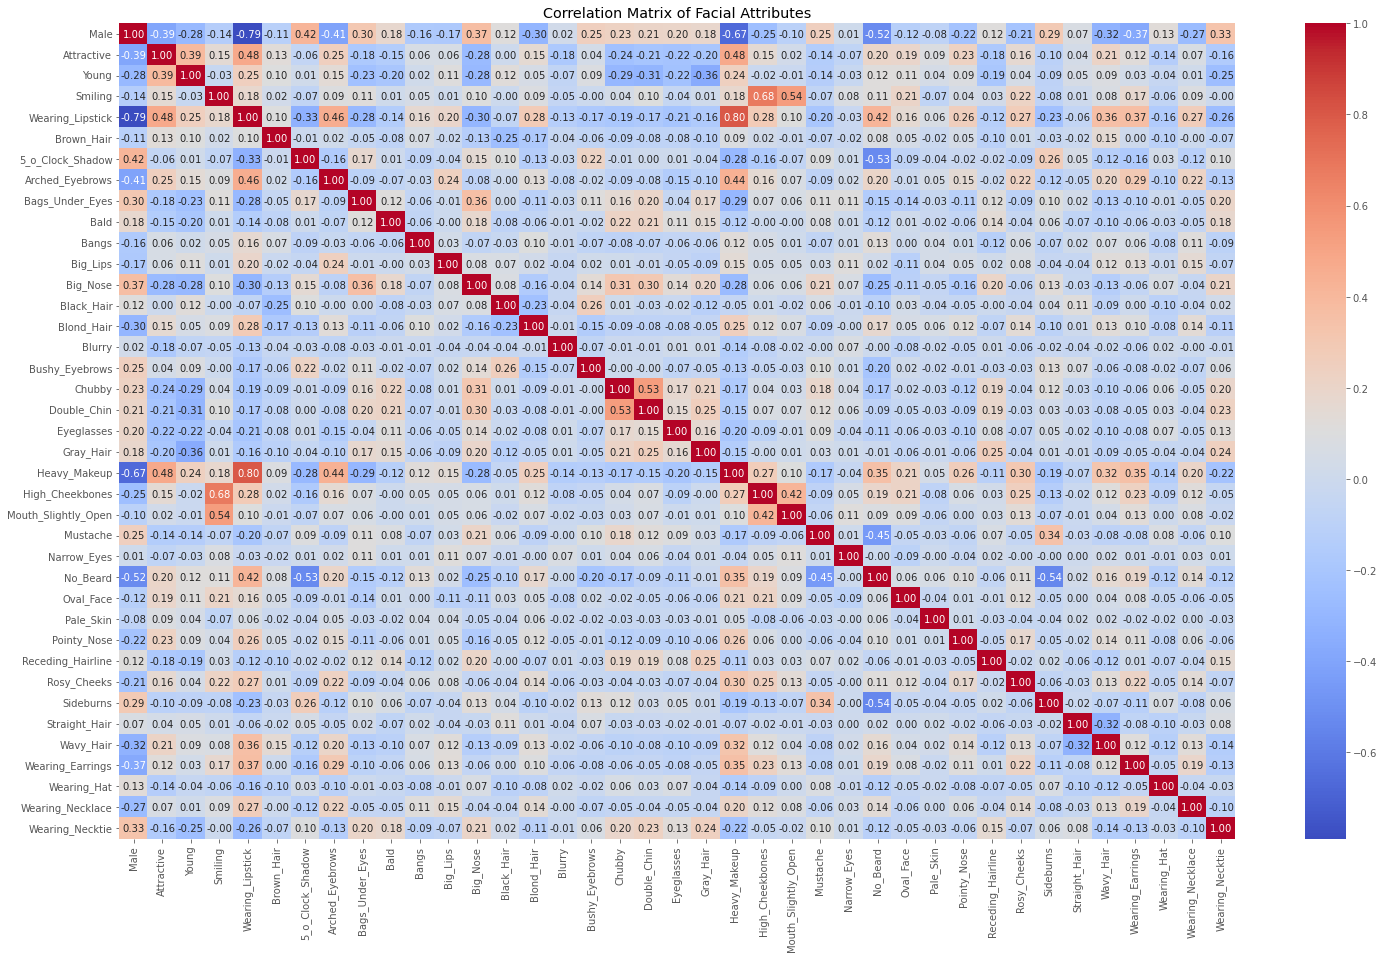

In [9]:
# Extract the relevant columns for correlation calculation
correlation_data = df_attr[['Male', 'Attractive', 'Young', 'Smiling', 'Wearing_Lipstick', 'Brown_Hair','5_o_Clock_Shadow', 'Arched_Eyebrows','Bags_Under_Eyes',
                            'Bald','Bangs', 'Big_Lips', 'Big_Nose','Black_Hair','Blond_Hair','Blurry','Bushy_Eyebrows', 'Chubby','Double_Chin','Eyeglasses',
                            'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones','Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes','No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 
                            'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Necklace', 'Wearing_Necktie']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Facial Attributes')
plt.show()


In [14]:
# Extract the correlation values related to 'Male' attribute
male_correlations = correlation_matrix['Male'].drop('Male')

# Find the indices of the features with the highest positive and negative correlation with being male
top_positive_corr_indices = male_correlations.argsort()[-10:][::-1]
top_negative_corr_indices = male_correlations.argsort()[:10]

# Get the feature names with the highest positive and negative correlation with being male
top_positive_corr_features = correlation_matrix.columns[top_positive_corr_indices]
top_negative_corr_features = correlation_matrix.columns[top_negative_corr_indices]

# Get the correlation values
top_positive_corr_values = male_correlations[top_positive_corr_indices]
top_negative_corr_values = male_correlations[top_negative_corr_indices]

# Print the results
print("Top ten features with the highest positive correlation with being Male:")
for feature, value in zip(top_positive_corr_features, top_positive_corr_values):
    print(f"{feature}: {value:.4f}")

print("\nTop ten features with the highest negative correlation with being Male:")
for feature, value in zip(top_negative_corr_features, top_negative_corr_values):
    print(f"{feature}: {value:.4f}")


Top ten features with the highest positive correlation with being Male:
Brown_Hair: 0.4177
Big_Lips: 0.3693
Wearing_Necklace: 0.3299
Arched_Eyebrows: 0.3011
Rosy_Cheeks: 0.2890
Blurry: 0.2471
Mouth_Slightly_Open: 0.2461
Bushy_Eyebrows: 0.2305
Chubby: 0.2075
Double_Chin: 0.2021

Top ten features with the highest negative correlation with being Male:
Smiling: -0.7894
Gray_Hair: -0.6667
Narrow_Eyes: -0.5222
5_o_Clock_Shadow: -0.4080
Male: -0.3945
Wavy_Hair: -0.3735
Straight_Hair: -0.3240
Black_Hair: -0.3030
Attractive: -0.2840
Wearing_Hat: -0.2706


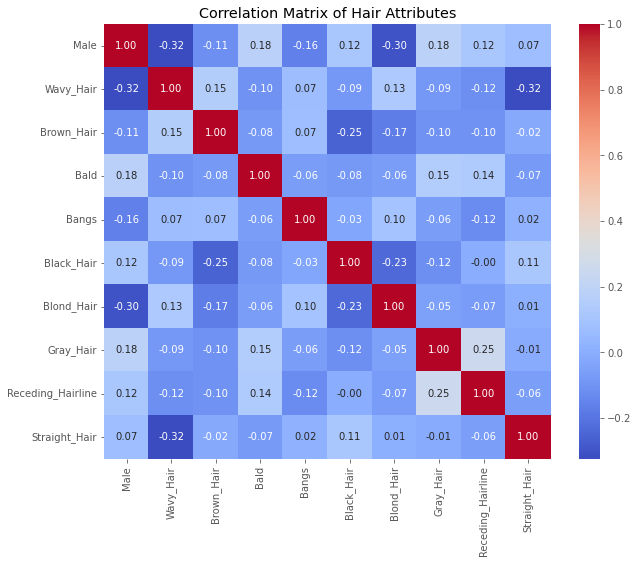

In [13]:
# Extract the relevant columns for correlation calculation
correlation_data_hair = df_attr[['Male','Wavy_Hair', 'Brown_Hair', 'Bald','Bangs','Black_Hair','Blond_Hair','Gray_Hair', 'Receding_Hairline', 
                                'Straight_Hair']]

# Calculate the correlation matrix
correlation_matrix_hair = correlation_data_hair.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_hair, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Hair Attributes')
plt.show()


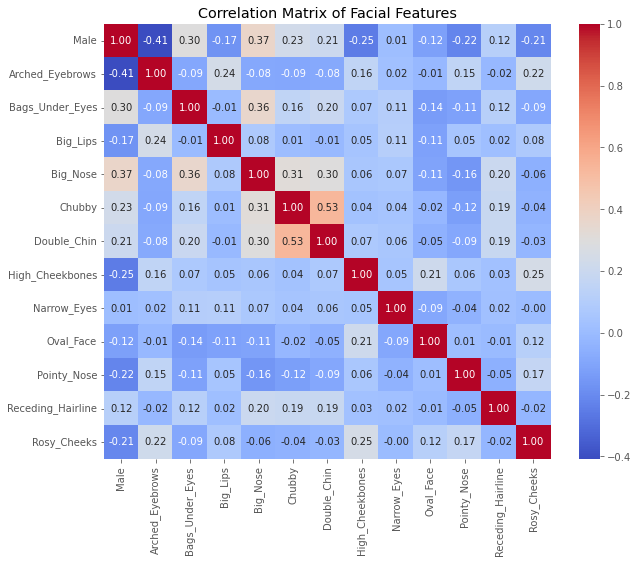

In [14]:
# Extract the relevant columns for correlation calculation
correlation_data_facialfeats = df_attr[['Male', 'Arched_Eyebrows','Bags_Under_Eyes', 'Big_Lips', 'Big_Nose','Chubby','Double_Chin', 'High_Cheekbones', 'Narrow_Eyes',
                                        'Oval_Face','Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks']]

# Calculate the correlation matrix
correlation_matrix_facialfeats = correlation_data_facialfeats.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_facialfeats, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Facial Features')
plt.show()


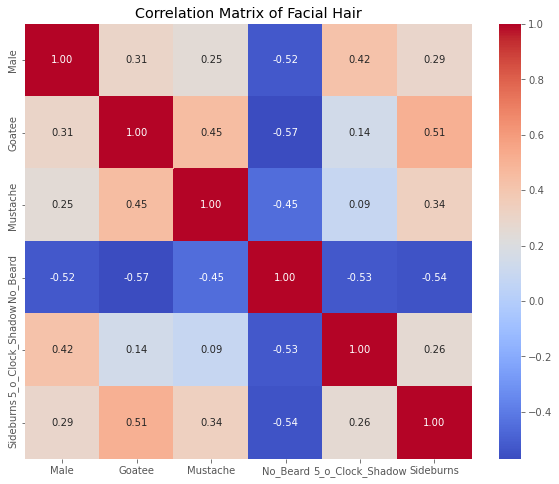

In [15]:
# Extract the relevant columns for correlation calculation
correlation_data_facialhair = df_attr[['Male', 'Goatee', 'Mustache', 'No_Beard', '5_o_Clock_Shadow', 'Sideburns']]

# Calculate the correlation matrix
correlation_matrix_facialhair = correlation_data_facialhair.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_facialhair, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Facial Hair')
plt.show()


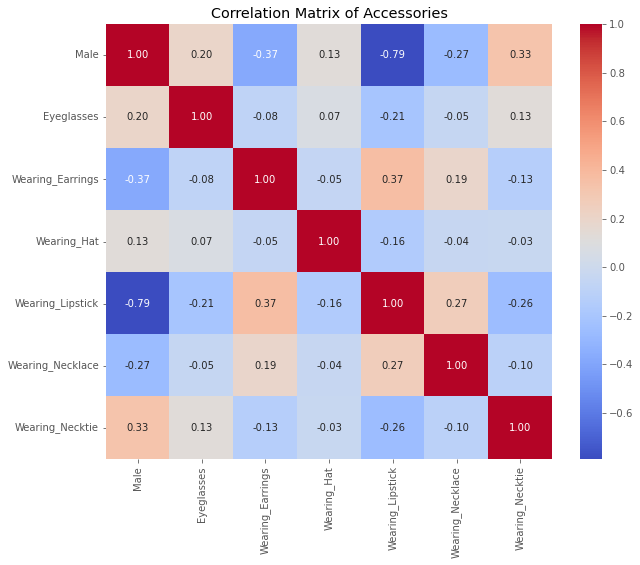

In [16]:
# Extract the relevant columns for correlation calculation
correlation_data_accessories = df_attr[['Male', 'Eyeglasses', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie']]

# Calculate the correlation matrix
correlation_matrix_accessories = correlation_data_accessories.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_accessories, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Accessories')
plt.show()


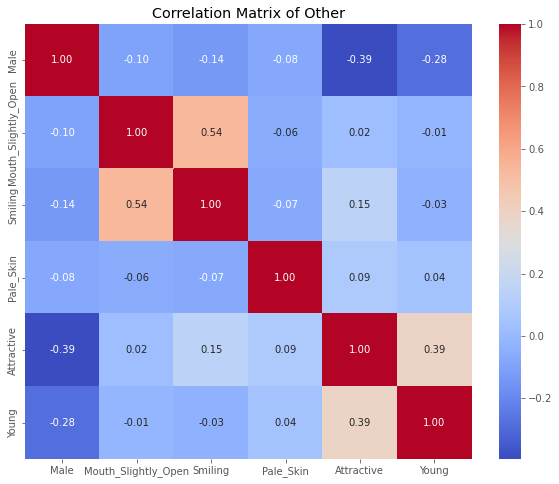

In [17]:
# Extract the relevant columns for correlation calculation
correlation_data_other = df_attr[['Male', 'Mouth_Slightly_Open', 'Smiling', 'Pale_Skin', 'Attractive', 'Young']]

# Calculate the correlation matrix
correlation_matrix_other = correlation_data_other.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_other, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Other')
plt.show()
